In [1]:
import os
import sys 
print(sys.path)

['C:\\Users\\camin\\PhD_DB\\CV2020-project_iMaterialist', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\python37.zip', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\DLLs', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\lib', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env', '', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\lib\\site-packages', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\lib\\site-packages\\win32', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\lib\\site-packages\\win32\\lib', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\lib\\site-packages\\Pythonwin', 'C:\\Users\\camin\\anaconda3\\envs\\pytorch_env\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\camin\\.ipython']


In [2]:
from PIL import Image, ImageFile
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from pathlib import Path 
from tqdm import tqdm, tqdm_notebook 
import pandas as pd 
import json 


In [3]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

def imshow(img, mask=None, bbox=None):
    plt.imshow(img)
    
    if mask is not None: 
        plt.imshow(mask, alpha=0.7)
    
    if bbox is not None: 
        xmin, ymin, xmax, ymax = bbox 
        plt.gca().add_patch(Rectangle((xmin,ymin),xmax-xmin  , ymax-ymin, linewidth=1,edgecolor='r',facecolor='none'))    

In [4]:
data_root = Path("../imaterialist-fashion-2020-fgvc7")
df_path   = Path(os.path.join(data_root, "train.csv"))

df_csv = pd.read_csv(os.path.join(data_root, df_path))  
image_ids = df_csv["ImageId"].unique()

img_lists = list(sorted(os.listdir(os.path.join(data_root, "train"))))

In [5]:
img_path = os.path.join(data_root, "train",img_lists[0])

pil_im = Image.open(img_path)
img = np.asarray(pil_im)

(5214, 3676, 3)

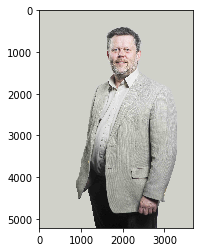

In [6]:
imshow(img)
img.shape

In [7]:
imgID = image_ids[0]

images_meta = {} # 
images_meta.update({ "image":img,
                     "shape":img.shape, 
                     "encoded_pixels": df_csv[df_csv['ImageId'] == imgID]['EncodedPixels'],
                     "class_ids" : df_csv[df_csv['ImageId'] == imgID]['ClassId']  
                    })

In [8]:
images_meta['encoded_pixels']

0    6068157 7 6073371 20 6078584 34 6083797 48 608...
1    6323163 11 6328356 32 6333549 53 6338742 75 63...
2    8521389 10 8526585 30 8531789 42 8537002 46 85...
3    12903854 2 12909064 7 12914275 10 12919485 15 ...
4    10837337 5 10842542 14 10847746 24 10852951 33...
5    11464158 10 11469372 30 11474586 43 11479800 4...
6    5910568 31 5915775 65 5920982 69 5926189 73 59...
7    6421446 292 6426657 298 6431867 305 6437078 31...
8    4566382 8 4571592 25 4576803 41 4582013 58 458...
Name: EncodedPixels, dtype: object

## Mask visualization 

In [9]:
def decodeMask(encodedPixels, heigh, width):
    en_pix = encodedPixels
    rle = list(map(int, en_pix.split(' ')))
    
    pixel,pixel_count = [],[]
    [pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]
    rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
    rle_mask_pixels = sum(rle_pixels,[]) 
    mask_img = np.zeros((5214*3676, 1), dtype=int )
    mask_img[rle_mask_pixels] = 255
    
    mask = np.reshape(mask_img, (width, heigh)).T
    return mask 

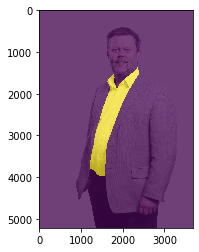

In [10]:
encodedPixels = images_meta['encoded_pixels'][1]
h, w, _ = img.shape

mask = decodeMask(encodedPixels, h, w)

imshow(img, mask, None)

***

# COCO formatted JSON 